**The purpose of this notebook is to analyze and find interesting indicators of "db amazon mineros 2.csv", which is a cleaned and preprocessed database version, generated by Mineros DataLab, of the original Amazon Movies and TV dataset.**

### 1. Import the requiered libraries

In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer
import re
from statistics import mean
import statistics
%matplotlib inline

### 2. Read the data and explore it

In [2]:
df = pd.read_csv("db amazon mineros 2.csv")
df.head(3)

,overall,reviewTime,reviewerID,asin,style,reviewText
0,5.0,2012,A2W166V2YQN6FI,B002HEXVUI,Amazon Video,"In,our,little,southeastern,Oregon,town,we,don,..."
1,5.0,2015,A2040XJMKQEV1,B00158K0RO,Blu-ray,Excellent
2,5.0,2014,A2WLRV7ZFCH5WR,B000E5KQQE,DVD,"This,series,is,excellent,I,ve,really,enjoyed,w..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   overall     500000 non-null  float64
 1   reviewTime  500000 non-null  int64  
 2   reviewerID  500000 non-null  object 
 3   asin        500000 non-null  object 
 4   style       500000 non-null  object 
 5   reviewText  500000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 22.9+ MB


In [4]:
df.shape

(500000, 6)

**Excellent! We have a database with 500k records and 6 columns. All the data is completed and there is not blank cells.**

### 3. Analyze the rating column

In [5]:
df["overall"].value_counts()

5.0    321545
4.0     89044
3.0     44984
1.0     23743
2.0     20684
Name: overall, dtype: int64

<AxesSubplot:>

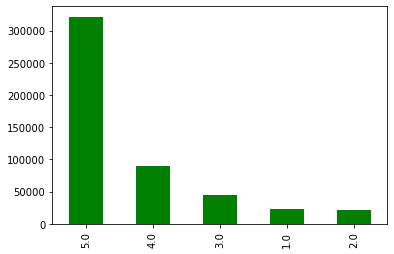

In [6]:
df["overall"].value_counts().plot(kind='bar', color='g')

In [7]:
# lets calculate the average rating of this dataset.
df['overall'].mean()

4.327928

**The majority of products received from the users a rating of 5.0. The average rating is 4.3, which denotes a high satisfaction of the users with the products.**

**The ratings of the database will be the labels of the reviews aiming to train and create a textual classifier. The objective of the textual classifier is to convert the textual opinion into a numeric perception, which can help to improve the recommendation of movies and TV shows for users. Nonetheless, the database is not balanced. There are too many records with 5.0 as ratings, and too little with 3.0, 2.0, and 1.0 as ratings. Maybe it would be better not to choose the records randomly from the complete cleaned dataset, which consists of 2,244,700 records and 6 columns, but to choose similar amounts of records per each rating.**

### 4. Analyze the years column

In [8]:
df["reviewTime"].value_counts().sort_index()

2012     20021
2013     58455
2014     88315
2015    139823
2016    125231
2017     51398
2018     16757
Name: reviewTime, dtype: int64

<AxesSubplot:>

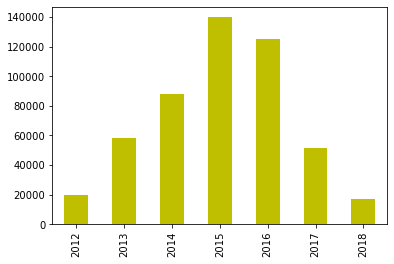

In [9]:
df['reviewTime'].value_counts().sort_index().plot(kind='bar', color='y')

**It is easy to perceive that from 2012 to 2018 the number of reviews per year formed a normal distribution curve. If we are planning to use reviews as one of the inputs for a recommender, then this situation is not good. After 2016, the number of reviews decreased drastically. If the experiments denote that the recommender improves with the use of reviews, then it is worth it that Amazon creates ways that encourage customers to review the products.**

### 5. Analyze the users column

In [10]:
users = df.reviewerID.unique()
print('Number of unique users in system is: ', len(users))

Number of unique users in system is:  203379


In [11]:
ratings_per_users = len(df)/len(users)
print('Ratio of ratings per user in system is: ', round(ratings_per_users,2))

Ratio of ratings per user in system is:  2.46


**There are 203,379 unique users in this dataset and a total of 500,000 records. Therefore, it can be say that on average one user rated 2.46 products. The ratings per user ratio is low and it could affect negatively (1) the sparsity of the dataset and (2) the performance of the recommender system.**

### 6. Analyze the items column

In [12]:
items = df.asin.unique()
print('Number of unique items in system is: ', len(items))

Number of unique items in system is:  45539


In [13]:
ratings_per_items = len(df)/len(items)
print('Ratio of ratings per item in system is: ', round(ratings_per_items,2))

Ratio of ratings per item in system is:  10.98


**There are 45,539 unique items in this dataset and a total of 500,000 records. Therefore, it can be say that on average one item was rated 10.98 times. The ratings per item ratio seems to be high and could affect positively the performance of the recommender engine.**

### 7. Analyze the reviews column

In [14]:
reviews_text = df.loc[:,'reviewText']

In [15]:
reviews = reviews_text.tolist()

In [16]:
reviews[:3]

['In,our,little,southeastern,Oregon,town,we,don,t,get,the,new,movie,releases,so,had,to,wait,until,Netflix,had,it,I,kept,it,for,a,hold,week,watching,it,over,and,over,I,now,have,this,movie,downloaded,so,I,can,watch,it,over,and,over,This,is,fantasy,or,is,it',
 'Excellent',
 'This,series,is,excellent,I,ve,really,enjoyed,watching,both,Season,3,and,Season,4,It,is,wonderful,to,have,great,values,woven,into,an,entertaining,story']

In [17]:
reviews_tokens = []
tokenizer = RegexpTokenizer(r'\w+')

for comment in reviews:
    reviews_tokens.append(tokenizer.tokenize(str(comment)))


In [18]:
reviews_tokens[:3]

[['In',
  'our',
  'little',
  'southeastern',
  'Oregon',
  'town',
  'we',
  'don',
  't',
  'get',
  'the',
  'new',
  'movie',
  'releases',
  'so',
  'had',
  'to',
  'wait',
  'until',
  'Netflix',
  'had',
  'it',
  'I',
  'kept',
  'it',
  'for',
  'a',
  'hold',
  'week',
  'watching',
  'it',
  'over',
  'and',
  'over',
  'I',
  'now',
  'have',
  'this',
  'movie',
  'downloaded',
  'so',
  'I',
  'can',
  'watch',
  'it',
  'over',
  'and',
  'over',
  'This',
  'is',
  'fantasy',
  'or',
  'is',
  'it'],
 ['Excellent'],
 ['This',
  'series',
  'is',
  'excellent',
  'I',
  've',
  'really',
  'enjoyed',
  'watching',
  'both',
  'Season',
  '3',
  'and',
  'Season',
  '4',
  'It',
  'is',
  'wonderful',
  'to',
  'have',
  'great',
  'values',
  'woven',
  'into',
  'an',
  'entertaining',
  'story']]

In [19]:
words_per_comment = []

for comment in reviews_tokens:
        words_in_comment = len(comment)
        words_per_comment.append(words_in_comment)

In [20]:
print('Average words per comment in the dataset: ', mean(words_per_comment))
print('Std. Dev. of words per comment in the dataset: ', statistics.stdev(words_per_comment))
print('Maximum words per comment in the dataset: ', max(words_per_comment))
print('Minimum words per comment in the dataset: ', min(words_per_comment))

Average words per comment in the dataset:  39.300708
Std. Dev. of words per comment in the dataset:  98.99947575866823
Maximum words per comment in the dataset:  5849
Minimum words per comment in the dataset:  1


**On average every comment has 39 words ± 99 words, i.e., it is normal that a comment has from 1 to 138 words. This is an important indicator to take into consideration when standardizing the lenght of all the comments before training a textual classifier. Besides, the comment with the maximum amount of words has 5849 words, and the one with the minimum amount of words has only 1 word.**

In [21]:
df_words = pd.DataFrame({'no. of words': words_per_comment})
df_words.head(3)

,no. of words
0,54
1,1
2,27


<AxesSubplot:ylabel='Frequency'>

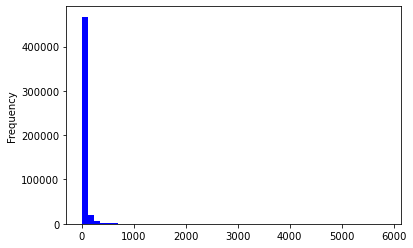

In [22]:
df_words['no. of words'].plot(kind='hist', bins = 50, color='b') 

**The majority of comments has less than 900 words, but the x axis of the histogram chart goes until 6000 because, as shown before, the review with the maximum amount of words has 5849 words. Probably this is just one comment and that is why it is difficult to perceive the blue bar of one data point in this chart, compared against the blue bar of more than 400,000 data points. Lets figure out how many reviews has more than 1,000 words!**

In [23]:
# to find how many reviews has more than 1000 words.
print(len(df_words[df_words['no. of words'] > 1000]))
print(round(708/len(df)*100, 2))

708
0.14


**Just the 0.14% of all the reviews has more than 1,000 words.**

In [24]:
# to find how many reviews has more than 3000 words.
print(len(df_words[df_words['no. of words'] > 3000]))
print(round(46/len(df)*100, 2))

46
0.01


**Just the 0.01% of all the reviews has more than 3,000 words.**

### 8. Analyze the style column

In [25]:
df["style"].value_counts()

DVD             224892
Amazon Video    182240
Blu-ray          57743
Prime Video      32911
VHS Tape          2214
Name: style, dtype: int64

<AxesSubplot:>

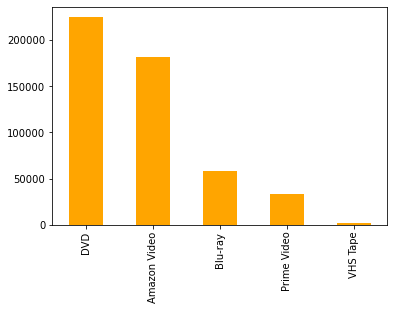

In [26]:
df["style"].value_counts().plot(kind='bar', color='orange')

**The majority of the movies and TV shows rated and reviewed in this dataset are presented as DVDs or Amazon Videos. There are just a few presented as Blu-ray and Prime Video. Finally, VHS Tape is the one with least records, which makes sense because is an old form to watch movies or TV shows. Lets try to find a trend in the behaviour thorugh the years of these different styles.**

In [27]:
dvd = df[df['style'] == 'DVD']
amazon = df[df['style'] == 'Amazon Video']
blu = df[df['style'] == 'Blu-ray']
prime = df[df['style'] == 'Prime Video']
vhs = df[df['style'] == 'VHS Tape']

<AxesSubplot:xlabel='reviewTime'>

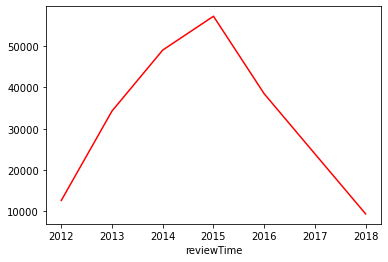

In [28]:
# DVD
dvd.groupby("reviewTime").count().overall.plot(color='r')

<AxesSubplot:xlabel='reviewTime'>

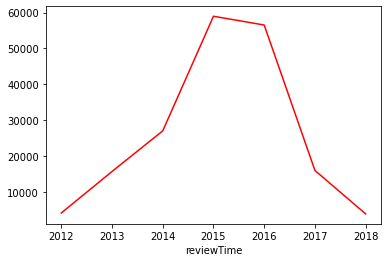

In [29]:
# Amazon Video
amazon.groupby("reviewTime").count().overall.plot(color='r')

<AxesSubplot:xlabel='reviewTime'>

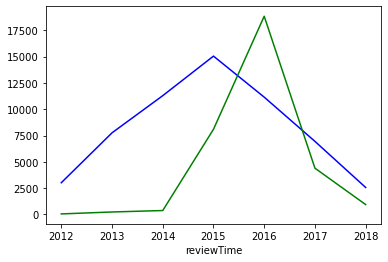

In [30]:
# Blu-ray
blu.groupby("reviewTime").count().overall.plot(color='b')
# Prime Video
prime.groupby("reviewTime").count().overall.plot(color='g')

<AxesSubplot:xlabel='reviewTime'>

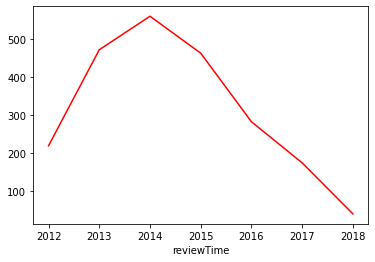

In [31]:
# VHS Tape
vhs.groupby("reviewTime").count().overall.plot(color='r')

**Practically, almost all the styles: DVD, Amazon Video, and Blu-ray, grows a lot from 2012 to 2015, and decreases with a big slope from 2015 to 2018. The behaviour of Prime Video is slightly different, it grows a little bit from 2012 to 2014, and grows fast from 2014 to 2016, then it decreases with a big slope from 2016 to 2018. Finally, VHS Tape is also different, it grows fast from 2012 to 2014, and after 2014 it decreases constantly.**